## Importing necessary libraries

In [ ]:
!pip install chart-studio

In [1]:
# text processing libraries
import re
import string
import nltk
from nltk.corpus import stopwords


# Visualisation libraries
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import chart_studio.plotly as py
import plotly.figure_factory as ff
from plotly.offline import iplot
import pandas as pd
from sentence_transformers import SentenceTransformer
from wordcloud import WordCloud
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [2]:
# reading the dataset
df = pd.read_excel("E:\Zortify\\data.xlsx")
print('data shape: ', df.shape)

data shape:  (1980, 18)


In [4]:
df.head()

,id,Geschlecht,Alter,Text,Extraversion_Classification,Gewissenhaftigkeit_Classification,EmotionaleStabilitaet_Classification,Offenheit_Classification,Empathie_Classification,Wirksamkeitsueberzeugung_Classification,Optimismus_Classification,Resilienz_Classification,UnternehmerischesKapital_Classification,AgilityMindset_Classification,Machiavellismus_Classification,Narzissmus_Classification,Psychopathie_Classification,ZerstoererischesPotential_Classification
0,15,M,1972,Ich habe meinen Vater bis zu seinem Tode gepfl...,LOW,AVERAGE,HIGH,AVERAGE,LOW,AVERAGE,LOW,AVERAGE,AVERAGE,AVERAGE,HIGH,LOW,AVERAGE,AVERAGE
1,20,F,1976,Ich habe die Aufnahmeprüfung beim Landesgymnas...,AVERAGE,LOW,AVERAGE,HIGH,AVERAGE,AVERAGE,LOW,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE
2,24,F,1966,Bei meinem Sohn wurde in Kindertagen ADHS diag...,LOW,HIGH,AVERAGE,HIGH,HIGH,AVERAGE,HIGH,AVERAGE,HIGH,AVERAGE,LOW,AVERAGE,AVERAGE,AVERAGE
3,45,F,1966,"Mein größter Erfolg war, dass es mir trotz mei...",AVERAGE,LOW,LOW,LOW,AVERAGE,LOW,AVERAGE,LOW,LOW,LOW,LOW,HIGH,AVERAGE,AVERAGE
4,49,M,1975,Ich habe siebeneinhalb Wohnungen gekauft. Eine...,AVERAGE,LOW,LOW,HIGH,LOW,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,HIGH,HIGH,HIGH


## Examples of each classification

In [5]:
# removing the unwanted columns
df = df.drop('id',axis = 1)

In [6]:
# checking for null values
df.isnull().sum()

Geschlecht                                  0
Alter                                       0
Text                                        0
Extraversion_Classification                 0
Gewissenhaftigkeit_Classification           0
EmotionaleStabilitaet_Classification        0
Offenheit_Classification                    0
Empathie_Classification                     0
Wirksamkeitsueberzeugung_Classification     0
Optimismus_Classification                   0
Resilienz_Classification                    0
UnternehmerischesKapital_Classification     0
AgilityMindset_Classification               0
Machiavellismus_Classification              0
Narzissmus_Classification                   0
Psychopathie_Classification                 0
ZerstoererischesPotential_Classification    0
dtype: int64

In [7]:
df.head()

,Geschlecht,Alter,Text,Extraversion_Classification,Gewissenhaftigkeit_Classification,EmotionaleStabilitaet_Classification,Offenheit_Classification,Empathie_Classification,Wirksamkeitsueberzeugung_Classification,Optimismus_Classification,Resilienz_Classification,UnternehmerischesKapital_Classification,AgilityMindset_Classification,Machiavellismus_Classification,Narzissmus_Classification,Psychopathie_Classification,ZerstoererischesPotential_Classification
0,M,1972,Ich habe meinen Vater bis zu seinem Tode gepfl...,LOW,AVERAGE,HIGH,AVERAGE,LOW,AVERAGE,LOW,AVERAGE,AVERAGE,AVERAGE,HIGH,LOW,AVERAGE,AVERAGE
1,F,1976,Ich habe die Aufnahmeprüfung beim Landesgymnas...,AVERAGE,LOW,AVERAGE,HIGH,AVERAGE,AVERAGE,LOW,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE
2,F,1966,Bei meinem Sohn wurde in Kindertagen ADHS diag...,LOW,HIGH,AVERAGE,HIGH,HIGH,AVERAGE,HIGH,AVERAGE,HIGH,AVERAGE,LOW,AVERAGE,AVERAGE,AVERAGE
3,F,1966,"Mein größter Erfolg war, dass es mir trotz mei...",AVERAGE,LOW,LOW,LOW,AVERAGE,LOW,AVERAGE,LOW,LOW,LOW,LOW,HIGH,AVERAGE,AVERAGE
4,M,1975,Ich habe siebeneinhalb Wohnungen gekauft. Eine...,AVERAGE,LOW,LOW,HIGH,LOW,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,HIGH,HIGH,HIGH


In [8]:
# Positive tweet
print("Low classification text Tweet example :\n",df[df['Extraversion_Classification']=='LOW']['Text'].values[0])
#negative_text
print("Average classification text example :\n",df[df['Extraversion_Classification']=='AVERAGE']['Text'].values[0])
#neutral_text
print("High classification text example  :\n",df[df['Extraversion_Classification']=='HIGH']['Text'].values[0])

Low classification text Tweet example :
 Ich habe meinen Vater bis zu seinem Tode gepflegt und ihn bis zum letzten Moment begleitet. Dank der Unterstützung meiner Frau konnte ich mir die nötige Zeit nehmen, mir entsprechende (technische) Fähigkeiten aneignen und eben auch für ihn da sein. Das Ergebnis war - trotz langer und schwerer Krankheit - eine "weiche Landung" für ihn. Gelernt habe ich, dass Loyalität bis in den Tod - auch wenn das in unserer hedonistischen und bigotten Zeit verfemt ist - das größte Kompliment ist, dass man machen kann und die entsprechende Dankbarkeit (die Teil der Leistung ist, mit der man sich solche Loyalität VERDIENT) der größte Lohn ist, den man bekommen kann. 
Average classification text example :
 Ich habe die Aufnahmeprüfung beim Landesgymnasium für Musik bestanden, ich habe mein Abitur erfolgreich abgelegt und daran anschließend einen Studienplatz beim Land Hessen bekommen, letztlich habe ich zwei Kindern das Leben geschenkt, was das allergrößte ist. Ic

## Distribution of the classification Column

In [9]:
df['Extraversion_Classification'].value_counts()

AVERAGE    860
LOW        650
HIGH       470
Name: Extraversion_Classification, dtype: int64

In [10]:
df['Extraversion_Classification'].value_counts(normalize=True)

AVERAGE    0.434343
LOW        0.328283
HIGH       0.237374
Name: Extraversion_Classification, dtype: float64

In [11]:
df['Extraversion_Classification'].value_counts(normalize=True).iplot(kind='bar',yTitle='Percentage', linecolor='black',opacity=0.7,color='red',theme='pearl',bargap=0.6,gridcolor='white',title='Distribution of classification column in the dataset')

In [12]:
# feature engineering 
# adding a new column named alter
from datetime import date

current_year = date.today().year
df['Alt'] = current_year - df['Alter']

In [13]:
df.head()

,Geschlecht,Alter,Text,Extraversion_Classification,Gewissenhaftigkeit_Classification,EmotionaleStabilitaet_Classification,Offenheit_Classification,Empathie_Classification,Wirksamkeitsueberzeugung_Classification,Optimismus_Classification,Resilienz_Classification,UnternehmerischesKapital_Classification,AgilityMindset_Classification,Machiavellismus_Classification,Narzissmus_Classification,Psychopathie_Classification,ZerstoererischesPotential_Classification,Alt
0,M,1972,Ich habe meinen Vater bis zu seinem Tode gepfl...,LOW,AVERAGE,HIGH,AVERAGE,LOW,AVERAGE,LOW,AVERAGE,AVERAGE,AVERAGE,HIGH,LOW,AVERAGE,AVERAGE,50
1,F,1976,Ich habe die Aufnahmeprüfung beim Landesgymnas...,AVERAGE,LOW,AVERAGE,HIGH,AVERAGE,AVERAGE,LOW,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,46
2,F,1966,Bei meinem Sohn wurde in Kindertagen ADHS diag...,LOW,HIGH,AVERAGE,HIGH,HIGH,AVERAGE,HIGH,AVERAGE,HIGH,AVERAGE,LOW,AVERAGE,AVERAGE,AVERAGE,56
3,F,1966,"Mein größter Erfolg war, dass es mir trotz mei...",AVERAGE,LOW,LOW,LOW,AVERAGE,LOW,AVERAGE,LOW,LOW,LOW,LOW,HIGH,AVERAGE,AVERAGE,56
4,M,1975,Ich habe siebeneinhalb Wohnungen gekauft. Eine...,AVERAGE,LOW,LOW,HIGH,LOW,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,HIGH,HIGH,HIGH,47


## Text Data Preprocessing

Before we start with any NLP project we need to pre-process the data to get it all in a consistent format.
We need to clean, tokenize and convert our data into a matrix. Let's create a function which will perform
the following tasks on the text columns:
#### Make text lowercase,
#### removes hyperlinks,
#### remove punctuation
#### removes numbers
#### tokenizes
#### removes stopwords

In [14]:
# text preprocessing helper functions

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text


def text_preprocessing(text):
    """
    Cleaning and parsing the text.

    """
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    nopunc = clean_text(text)
    tokenized_text = tokenizer.tokenize(nopunc)
    remove_stopwords = [w for w in tokenized_text if w not in stopwords.words('german')]
    combined_text = ' '.join(remove_stopwords)
    return combined_text

clean_text() function applies a first round of text cleaning techniques.the function text_preprocessing then takes in the processed text from the clean_text() function and applies techniques like tokenization and stop word removal.

In [15]:
# Applying the cleaning functionto the dataset
df['Text_clean'] = df['Text'].apply(str).apply(lambda x: text_preprocessing(x))

In [16]:
df.head()

,Geschlecht,Alter,Text,Extraversion_Classification,Gewissenhaftigkeit_Classification,EmotionaleStabilitaet_Classification,Offenheit_Classification,Empathie_Classification,Wirksamkeitsueberzeugung_Classification,Optimismus_Classification,Resilienz_Classification,UnternehmerischesKapital_Classification,AgilityMindset_Classification,Machiavellismus_Classification,Narzissmus_Classification,Psychopathie_Classification,ZerstoererischesPotential_Classification,Alt,Text_clean
0,M,1972,Ich habe meinen Vater bis zu seinem Tode gepfl...,LOW,AVERAGE,HIGH,AVERAGE,LOW,AVERAGE,LOW,AVERAGE,AVERAGE,AVERAGE,HIGH,LOW,AVERAGE,AVERAGE,50,vater tode gepflegt letzten moment begleitet d...
1,F,1976,Ich habe die Aufnahmeprüfung beim Landesgymnas...,AVERAGE,LOW,AVERAGE,HIGH,AVERAGE,AVERAGE,LOW,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,46,aufnahmeprüfung beim landesgymnasium musik bes...
2,F,1966,Bei meinem Sohn wurde in Kindertagen ADHS diag...,LOW,HIGH,AVERAGE,HIGH,HIGH,AVERAGE,HIGH,AVERAGE,HIGH,AVERAGE,LOW,AVERAGE,AVERAGE,AVERAGE,56,sohn wurde kindertagen adhs diagnostiziert müh...
3,F,1966,"Mein größter Erfolg war, dass es mir trotz mei...",AVERAGE,LOW,LOW,LOW,AVERAGE,LOW,AVERAGE,LOW,LOW,LOW,LOW,HIGH,AVERAGE,AVERAGE,56,größter erfolg trotz erkrankung immer erstaunl...
4,M,1975,Ich habe siebeneinhalb Wohnungen gekauft. Eine...,AVERAGE,LOW,LOW,HIGH,LOW,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,HIGH,HIGH,HIGH,47,siebeneinhalb wohnungen gekauft bewohne selber...


### Analyzing Text Statistics

We can now do some statistical analysis to explore the fundamental characteristics of the text data. Some of the analysis which can be useful are:
- Text length analysis
- word frequency analysis

To perform these analysis, let us create two new features i.e
- one which calculates the length of the text, and
- second which calculates the word count.

In [17]:
df['text_len'] = df['Text_clean'].astype(str).apply(len)
df['text_word_count'] = df['Text_clean'].apply(lambda x: len(str(x).split()))

In [18]:
df.head()

,Geschlecht,Alter,Text,Extraversion_Classification,Gewissenhaftigkeit_Classification,EmotionaleStabilitaet_Classification,Offenheit_Classification,Empathie_Classification,Wirksamkeitsueberzeugung_Classification,Optimismus_Classification,...,UnternehmerischesKapital_Classification,AgilityMindset_Classification,Machiavellismus_Classification,Narzissmus_Classification,Psychopathie_Classification,ZerstoererischesPotential_Classification,Alt,Text_clean,text_len,text_word_count
0,M,1972,Ich habe meinen Vater bis zu seinem Tode gepfl...,LOW,AVERAGE,HIGH,AVERAGE,LOW,AVERAGE,LOW,...,AVERAGE,AVERAGE,HIGH,LOW,AVERAGE,AVERAGE,50,vater tode gepflegt letzten moment begleitet d...,366,44
1,F,1976,Ich habe die Aufnahmeprüfung beim Landesgymnas...,AVERAGE,LOW,AVERAGE,HIGH,AVERAGE,AVERAGE,LOW,...,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,46,aufnahmeprüfung beim landesgymnasium musik bes...,224,26
2,F,1966,Bei meinem Sohn wurde in Kindertagen ADHS diag...,LOW,HIGH,AVERAGE,HIGH,HIGH,AVERAGE,HIGH,...,HIGH,AVERAGE,LOW,AVERAGE,AVERAGE,AVERAGE,56,sohn wurde kindertagen adhs diagnostiziert müh...,182,23
3,F,1966,"Mein größter Erfolg war, dass es mir trotz mei...",AVERAGE,LOW,LOW,LOW,AVERAGE,LOW,AVERAGE,...,LOW,LOW,LOW,HIGH,AVERAGE,AVERAGE,56,größter erfolg trotz erkrankung immer erstaunl...,240,26
4,M,1975,Ich habe siebeneinhalb Wohnungen gekauft. Eine...,AVERAGE,LOW,LOW,HIGH,LOW,AVERAGE,AVERAGE,...,AVERAGE,AVERAGE,AVERAGE,HIGH,HIGH,HIGH,47,siebeneinhalb wohnungen gekauft bewohne selber...,242,28


Let's create three separate dataframes for positive, neutral and negative sentiments. This will help in analyzing the text statistics separately for separate polarities.

In [19]:
low = df[df['Extraversion_Classification']=='LOW']
high = df[df['Extraversion_Classification']=='HIGH']
average = df[df['Extraversion_Classification']=='AVERAGE']

### Sentence length analysis

In [20]:
low['text_len'].iplot(
    kind='hist',
    bins=100,
    xTitle='text length',
    linecolor='black',
    color='red',
    yTitle='count',
    title='Low classified Text Length Distribution')

high['text_len'].iplot(
    kind='hist',
    bins=100,
    xTitle='text length',
    linecolor='black',
    color='green',
    yTitle='count',
    title='High classified Text Length Distribution')

average['text_len'].iplot(
    kind='hist',
    bins=100,
    xTitle='text length',
    linecolor='black',
    yTitle='count',
    title='average classified Text Length Distribution')

The histogram shows that the length of the cleaned text ranges from around 80 to 800 characters for low and hgh classification and around 600 for average classification .

In [21]:
trace0 = go.Box(
    y=high['text_len'],
    name = 'high classified Text',
    marker = dict(
        color = 'red',
    )
)

trace1 = go.Box(
    y=low['text_len'],
    name = 'low classified Text',
    marker = dict(
        color = 'green',
    )
)

trace2 = go.Box(
    y=average['text_len'],
    name = 'average classified Text',
    marker = dict(
        color = 'orange',
    )
)
data = [trace0, trace1, trace2]
layout = go.Layout(
    title = "Length of the text"
)

fig = go.Figure(data=data,layout=layout)
iplot(fig, filename = "Length of the text of different polarities")

All the text appear to have more or less same length. Hence, length of the text isn't a powerful indicator of the polarity.

### Text word count analysis

In [22]:
high['text_word_count'].iplot(
    kind='hist',
    bins=50,
    xTitle='text length',
    linecolor='black',
    color='red',
    yTitle='count',
    title='highly classified Text word count')

low['text_word_count'].iplot(
    kind='hist',
    bins=50,
    xTitle='text length',
    linecolor='black',
    color='green',
    yTitle='count',
    title='low classified Text word count')
average['text_word_count'].iplot(
    kind='hist',
    bins=50,
    xTitle='text length',
    linecolor='black',
    yTitle='count',
    title='average Text word count')

Again, more or less, word count is also similar across positive, negative and neutral texts.This will be more clear with the Box Plots below.

In [23]:
trace0 = go.Box(
    y=high['text_word_count'],
    name = 'high classified Text',
    marker = dict(
        color = 'red',
    )
)

trace1 = go.Box(
    y=low['text_word_count'],
    name = 'low clasified Text',
    marker = dict(
        color = 'green',
    )
)

trace2 = go.Box(
    y=average['text_word_count'],
    name = 'average classified Text',
    marker = dict(
        color = 'orange',
    )
)
data = [trace0, trace1, trace2]
layout = go.Layout(
    title = "word count of the text"
)

fig = go.Figure(data=data,layout=layout)
iplot(fig, filename = "word count of the text of different polarities")

### Exploring the text column

In [24]:
high = df[df['Extraversion_Classification'] == 'HIGH']['Text']
low = df[df['Extraversion_Classification'] == 'LOW']['Text']
average = df[df['Extraversion_Classification'] == 'AVERAGE']['Text']

In [25]:
# High text
print("High classified Text example :",high.values[0])
#Low_text
print("Low classified Text example :",low.values[0])
#Average_text
print("Average classified text example  :",average.values[0])

High classified Text example : ich denke das ich meine familie so hin bekommen habe und mein familien leben mit dem beruf kinder und mann gut gemeister habe und mir nicht sfehlen tut dazu noch meine freunde nicht verlohren gegagen sind ergeiz und disziplin sind der garant für den erfolg und dazu der rückhalt und gute planung ich lerne noch immer
Low classified Text example : Ich habe meinen Vater bis zu seinem Tode gepflegt und ihn bis zum letzten Moment begleitet. Dank der Unterstützung meiner Frau konnte ich mir die nötige Zeit nehmen, mir entsprechende (technische) Fähigkeiten aneignen und eben auch für ihn da sein. Das Ergebnis war - trotz langer und schwerer Krankheit - eine "weiche Landung" für ihn. Gelernt habe ich, dass Loyalität bis in den Tod - auch wenn das in unserer hedonistischen und bigotten Zeit verfemt ist - das größte Kompliment ist, dass man machen kann und die entsprechende Dankbarkeit (die Teil der Leistung ist, mit der man sich solche Loyalität VERDIENT) der größt

### Pre-processed text columns

In [26]:
high_text_clean = high.apply(lambda x: text_preprocessing(x))
low_text_clean = low.apply(lambda x: text_preprocessing(x))
average_text_clean = average.apply(lambda x: text_preprocessing(x))

### Wordclouds

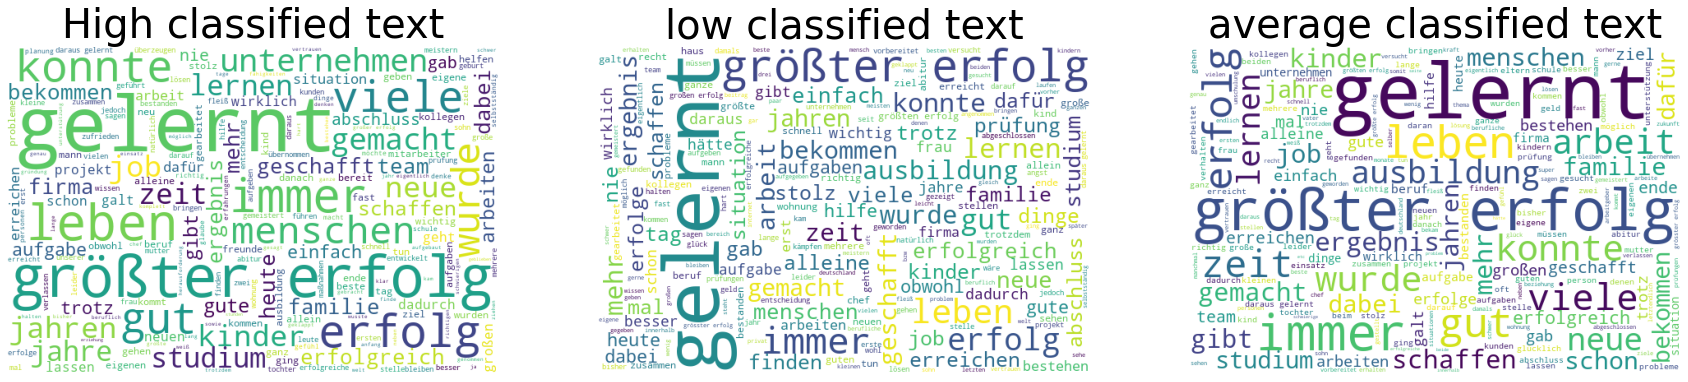

In [27]:
from wordcloud import WordCloud
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[30, 15])
wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(high_text_clean))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('High classified text',fontsize=40);

wordcloud2 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(low_text_clean))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('low classified text',fontsize=40);

wordcloud3 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(average_text_clean))
ax3.imshow(wordcloud3)
ax3.axis('off')
ax3.set_title('average classified text',fontsize=40);

### Age distribution by Gender

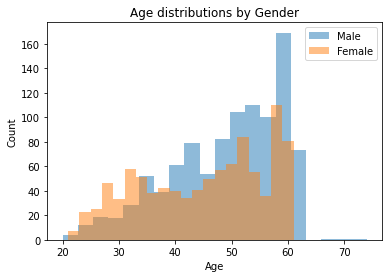

In [28]:
plt.hist(df[df['Geschlecht']=='M']['Alt'], alpha=0.5, label="Male", bins=20)
plt.hist(df[df['Geschlecht']=='F']['Alt'], alpha=0.5, label="Female", bins=20)
plt.title("Age distributions by Gender")
plt.ylabel("Count")
plt.xlabel("Age")
plt.legend()
plt.show()

### Extraversion Classification Vs Gender

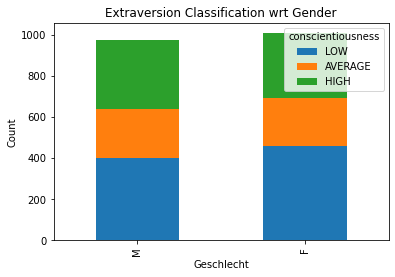

In [29]:
df.groupby([ 'Geschlecht','Extraversion_Classification']).size().unstack().plot(kind='bar', stacked=True)
plt.xticks([0,1], ['M', 'F'])
plt.ylabel("Count")
plt.title("Extraversion Classification wrt Gender")
plt.legend(title = 'conscientiousness', labels =['LOW', 'AVERAGE','HIGH'])
plt.show()

### EmotionaleStabilitaet_Classification based on Age

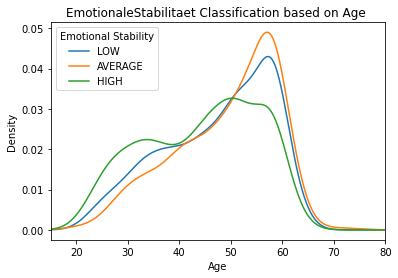

In [30]:
df.groupby('EmotionaleStabilitaet_Classification')['Alt'].plot(kind='density')
plt.xlim(15,80)
plt.title("EmotionaleStabilitaet Classification based on Age ")
plt.legend(title = 'Emotional Stability', labels =['LOW','AVERAGE', 'HIGH']) # add label names
plt.xlabel('Age')
plt.show()

In [31]:
df.head()

,Geschlecht,Alter,Text,Extraversion_Classification,Gewissenhaftigkeit_Classification,EmotionaleStabilitaet_Classification,Offenheit_Classification,Empathie_Classification,Wirksamkeitsueberzeugung_Classification,Optimismus_Classification,...,UnternehmerischesKapital_Classification,AgilityMindset_Classification,Machiavellismus_Classification,Narzissmus_Classification,Psychopathie_Classification,ZerstoererischesPotential_Classification,Alt,Text_clean,text_len,text_word_count
0,M,1972,Ich habe meinen Vater bis zu seinem Tode gepfl...,LOW,AVERAGE,HIGH,AVERAGE,LOW,AVERAGE,LOW,...,AVERAGE,AVERAGE,HIGH,LOW,AVERAGE,AVERAGE,50,vater tode gepflegt letzten moment begleitet d...,366,44
1,F,1976,Ich habe die Aufnahmeprüfung beim Landesgymnas...,AVERAGE,LOW,AVERAGE,HIGH,AVERAGE,AVERAGE,LOW,...,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,AVERAGE,46,aufnahmeprüfung beim landesgymnasium musik bes...,224,26
2,F,1966,Bei meinem Sohn wurde in Kindertagen ADHS diag...,LOW,HIGH,AVERAGE,HIGH,HIGH,AVERAGE,HIGH,...,HIGH,AVERAGE,LOW,AVERAGE,AVERAGE,AVERAGE,56,sohn wurde kindertagen adhs diagnostiziert müh...,182,23
3,F,1966,"Mein größter Erfolg war, dass es mir trotz mei...",AVERAGE,LOW,LOW,LOW,AVERAGE,LOW,AVERAGE,...,LOW,LOW,LOW,HIGH,AVERAGE,AVERAGE,56,größter erfolg trotz erkrankung immer erstaunl...,240,26
4,M,1975,Ich habe siebeneinhalb Wohnungen gekauft. Eine...,AVERAGE,LOW,LOW,HIGH,LOW,AVERAGE,AVERAGE,...,AVERAGE,AVERAGE,AVERAGE,HIGH,HIGH,HIGH,47,siebeneinhalb wohnungen gekauft bewohne selber...,242,28


### Group plots to analyse which plot highest effect

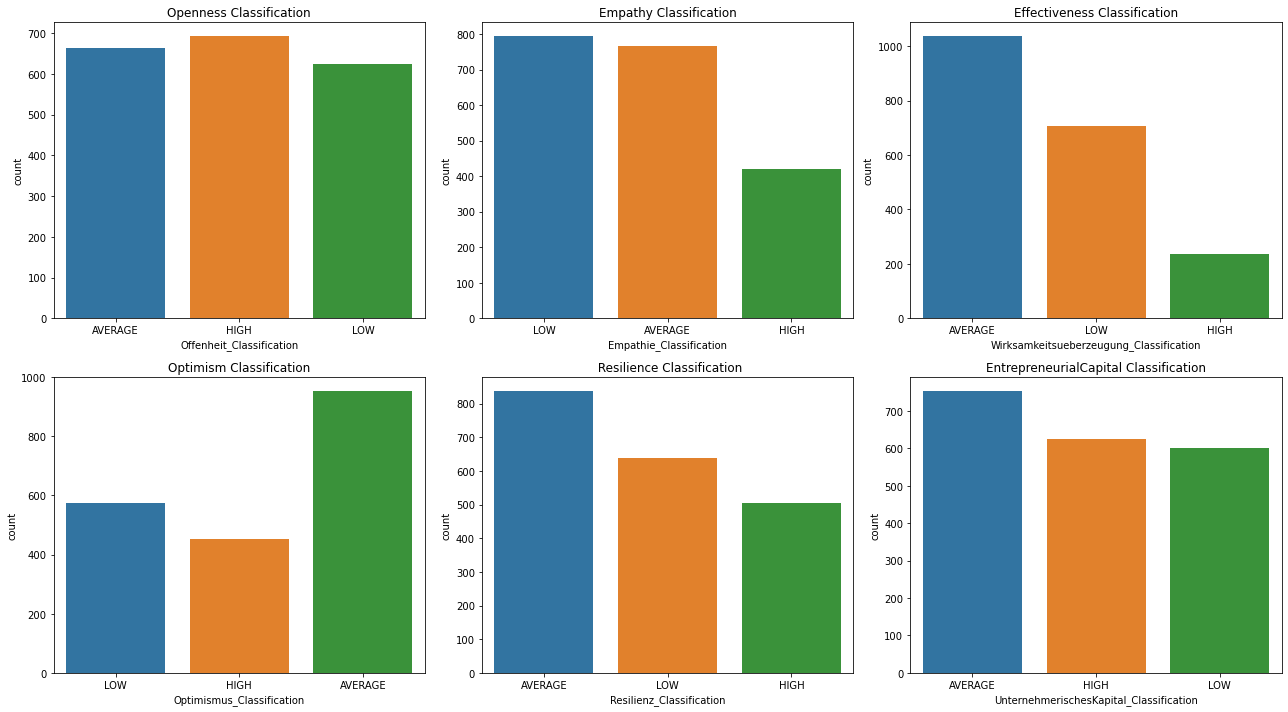

In [32]:
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18,10))

sns.countplot(x='Offenheit_Classification', data = df, ax = axes[0,0])
axes[0, 0].set_title('Openness Classification')

sns.countplot(x='Empathie_Classification', data = df, ax = axes[0,1])
axes[0, 1].set_title('Empathy Classification')

sns.countplot(x='Wirksamkeitsueberzeugung_Classification', data = df, ax = axes[0,2])
axes[0, 2].set_title('Effectiveness Classification')

sns.countplot(x='Optimismus_Classification', data = df, ax = axes[1,0])
axes[1, 0].set_title('Optimism Classification')

sns.countplot(x='Resilienz_Classification', data = df, ax = axes[1,1])
axes[1, 1].set_title(' Resilience Classification')

sns.countplot(x='UnternehmerischesKapital_Classification', data = df, ax = axes[1,2])
axes[1, 2].set_title('EntrepreneurialCapital Classification')


plt.tight_layout()
plt.show()

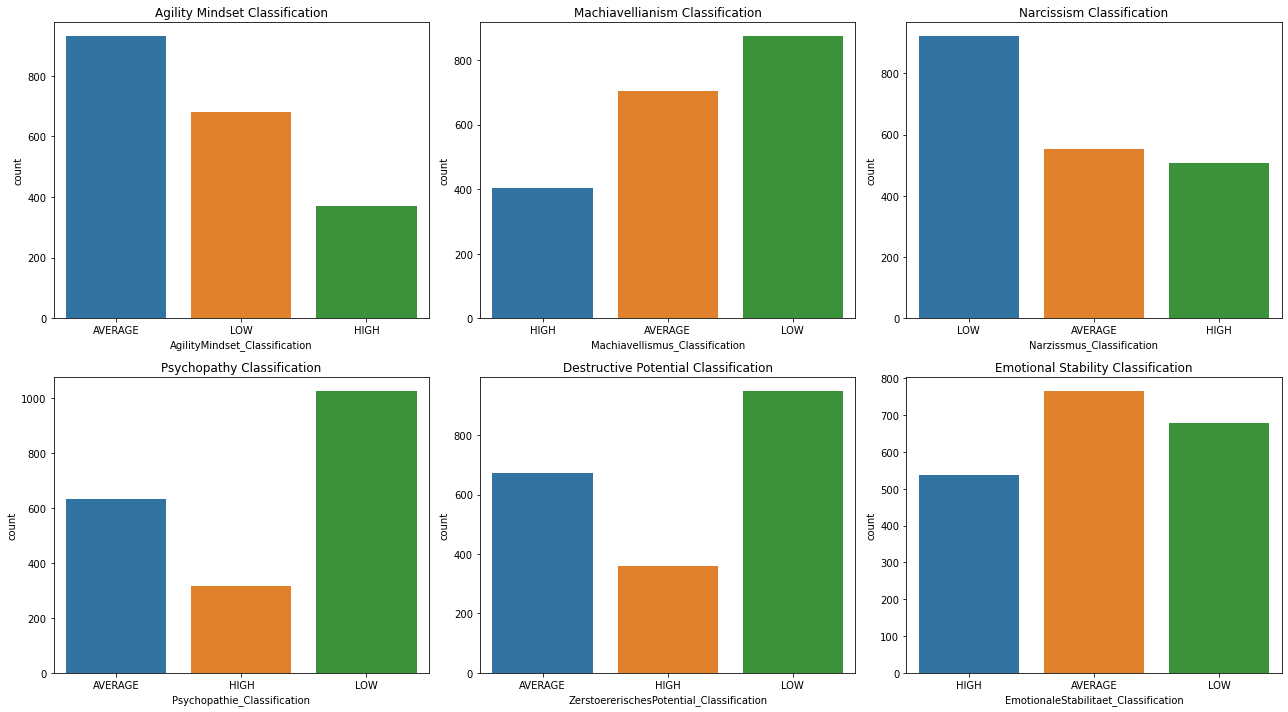

In [33]:
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18,10))

sns.countplot(x='AgilityMindset_Classification', data = df, ax = axes[0,0])
axes[0, 0].set_title('Agility Mindset Classification')

sns.countplot(x='Machiavellismus_Classification', data = df, ax = axes[0,1])
axes[0, 1].set_title('Machiavellianism Classification')

sns.countplot(x='Narzissmus_Classification', data = df, ax = axes[0,2])
axes[0, 2].set_title('Narcissism Classification')

sns.countplot(x='Psychopathie_Classification', data = df, ax = axes[1,0])
axes[1, 0].set_title('Psychopathy Classification')

sns.countplot(x='ZerstoererischesPotential_Classification', data = df, ax = axes[1,1])
axes[1, 1].set_title('Destructive Potential Classification')

sns.countplot(x='EmotionaleStabilitaet_Classification', data = df, ax = axes[1,2])
axes[1, 2].set_title('Emotional Stability Classification')

plt.tight_layout()
plt.show()

## Using sentence transformers

In [ ]:
import re
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer
embedder = SentenceTransformer('distilbert-base-nli-mean-tokens')

In [60]:
corpus = list(df['Text_clean'])

### Clustering

In [61]:
corpus_embeddings = embedder.encode(corpus)

In [62]:
corpus_embeddings

array([[-1.2396713 ,  0.40501982, -0.01139395, ..., -0.69626886,
         0.4695754 ,  0.00766182],
       [-1.4102973 ,  0.54091567,  0.0673288 , ..., -0.7153071 ,
         0.35748774, -0.01544666],
       [-1.9372158 ,  0.27201226,  0.205659  , ..., -0.9881908 ,
         0.45938596,  0.13920765],
       ...,
       [-1.8202088 ,  0.44012833, -0.02987668, ..., -1.0415366 ,
         0.35055825,  0.21849707],
       [-0.6758124 , -0.2722769 , -0.00587173, ..., -0.9720123 ,
        -0.2830528 , -0.44827983],
       [-1.2865391 ,  0.01391637, -0.23992018, ..., -1.0752698 ,
         0.8143055 ,  0.1391119 ]], dtype=float32)

In [63]:
num_clusters = 3
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

In [64]:
cluster_assignment

array([0, 0, 0, ..., 0, 2, 0])

In [65]:
cluster_df = pd.DataFrame(corpus, columns = ['corpus'])
cluster_df['cluster'] = cluster_assignment
cluster_df.head()

,corpus,cluster
0,vater tode gepflegt letzten moment begleitet d...,0
1,aufnahmeprüfung beim landesgymnasium musik bes...,0
2,sohn wurde kindertagen adhs diagnostiziert müh...,0
3,größter erfolg trotz erkrankung immer erstaunl...,0
4,siebeneinhalb wohnungen gekauft bewohne selber...,0


In [66]:
clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
['vater tode gepflegt letzten moment begleitet dank unterstützung frau konnte nötige zeit nehmen entsprechende technische fähigkeiten aneignen eben ergebnis trotz langer schwerer krankheit weiche landung gelernt loyalität tod unserer hedonistischen bigotten zeit verfemt größte kompliment entsprechende dankbarkeit teil leistung loyalität verdient größte lohn bekommen', 'aufnahmeprüfung beim landesgymnasium musik bestanden abitur erfolgreich abgelegt daran anschließend studienplatz beim land hessen bekommen letztlich zwei kindern leben geschenkt allergrößte dabei gelernt dran bleiben glaiben', 'sohn wurde kindertagen adhs diagnostiziert mühe anstrengungen gekostet durchzustehen toller mann geworden erreicht mutter starb jahre alt erreicht obwohl schaffen machte darauf stolz', 'größter erfolg trotz erkrankung immer erstaunlich gut geht leider indirekt regelmäßige ärztliche kontrollen regelmäßige medikamenteneinnahme vernünftige gesunde lebensweise beeinflussen bemühe stets lern

### Visualization

In [67]:
#word cloud
def word_cloud(pred_df,label):
    wc = ' '.join([text for text in pred_df['corpus'][pred_df['cluster'] == label]])
    wordcloud = WordCloud(width=800, height=500,
    random_state=21, max_font_size=110).generate(wc)
    fig7 = plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')

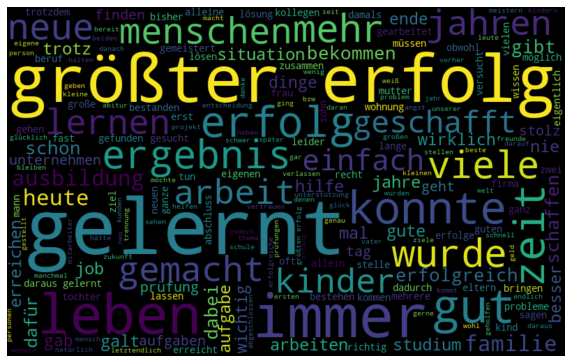

In [68]:
word_cloud(cluster_df,0)

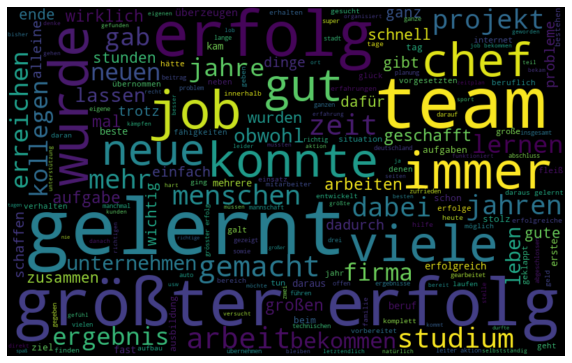

In [69]:
word_cloud(cluster_df,1)

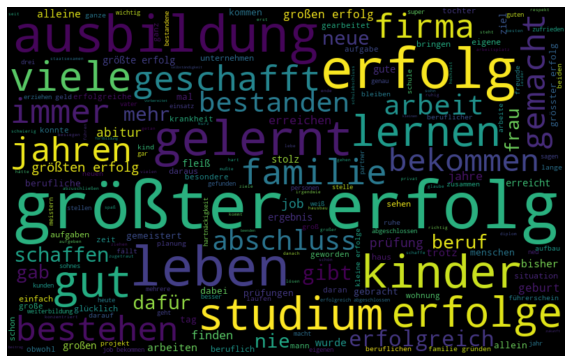

In [71]:
word_cloud(cluster_df,2)